# Data Cleaning

In [35]:
import numpy as np
import pandas as pd

In [36]:
file = "C:/Users/María Moya/Documents/GitHub/PROJECT_EDA_JOAQUINVILLAR_ONLINE_DS_THEBRIDGE/src/data/Hello_Auto_data.xlsx"

df_policies = pd.read_excel(file)
df_policies
df_policies.sample(12)

,policyId,policyStatus,policyStartDate,policyEndDate,tipoPoliza
40226,40822.0,CANCELED,2023-10-02,2024-10-01,Smart
39214,39801.0,ACTIVE,2023-09-22,2024-09-21,Smart
36263,36823.0,ACTIVE,2023-07-03,2024-07-02,Smart
15827,16068.0,CANCELED,2022-03-22,2023-03-21,Smart
24499,24818.0,ACTIVE,2023-10-20,2024-10-19,Smart
15086,15314.0,CANCELED,2022-03-02,2023-03-01,Smart
26755,27102.0,CANCELED,2023-02-01,2024-01-31,Smart
28177,28554.0,ACTIVE,2023-02-13,2024-02-12,Smart
30830,31300.0,ACTIVE,2023-03-06,2024-03-05,Smart
26472,26813.0,CANCELED,2023-12-08,2024-12-07,Smart


In [37]:
df_policies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44427 entries, 0 to 44426
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   policyId         44174 non-null  float64       
 1   policyStatus     44174 non-null  object        
 2   policyStartDate  44174 non-null  datetime64[ns]
 3   policyEndDate    44174 non-null  datetime64[ns]
 4   tipoPoliza       44174 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 1.7+ MB


| Column          | Description  |
|-----------------|-----------------|
| policyId        | Número de identificación de póliza contratada| 
| policyStatus    | Estado de la póliza| 
| policyStartDate | Inicio de póliza| 
| policyEndDate   | Final de póliza|
| tipoPoliza      | Tipo de póliza contratada| 


In [38]:
df_policies.duplicated(keep= False).sum() # Filas duplicadas del DF

np.int64(253)

In [39]:
df_policies_cleaned = df_policies.drop_duplicates(keep = 'first')

In [40]:
df_policies_cleaned.duplicated(keep=False).sum()

np.int64(0)

In [41]:
df_policies_cleaned.policyStatus.value_counts()

policyStatus
CANCELED    30847
ACTIVE      13327
Name: count, dtype: int64

In [42]:
df_policies_cleaned.tipoPoliza.value_counts()

tipoPoliza
Smart    39406
Flex      4768
Name: count, dtype: int64

In [43]:
df_policies_cleaned.isnull().sum()

policyId           1
policyStatus       1
policyStartDate    1
policyEndDate      1
tipoPoliza         1
dtype: int64

# Análisis Univariante

In [44]:
# Selección
df_tipificacion = pd.DataFrame([df_policies_cleaned.nunique(), df_policies_cleaned.nunique()/len(df_policies_cleaned) * 100, df_policies_cleaned.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
policyId,44174,99.997736,float64
policyStatus,2,0.004527,object
policyStartDate,1316,2.979061,datetime64[ns]
policyEndDate,1317,2.981324,datetime64[ns]
tipoPoliza,2,0.004527,object


In [45]:
df_tipificacion["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
policyId,44174,99.997736,float64,Numerica Continua
policyStatus,2,0.004527,object,Binaria
policyStartDate,1316,2.979061,datetime64[ns],Numerica Discreta
policyEndDate,1317,2.981324,datetime64[ns],Numerica Discreta
tipoPoliza,2,0.004527,object,Binaria


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [48]:
categoricas_p = ["policyStatus", "tipoPoliza"]

In [49]:
# Frecuencia Absoluta
for i in categoricas_p:
    print(f"Para{i}")
    print(df_policies_cleaned[i].value_counts())
    print("\n"*2)

ParapolicyStatus
policyStatus
CANCELED    30847
ACTIVE      13327
Name: count, dtype: int64



ParatipoPoliza
tipoPoliza
Smart    39406
Flex      4768
Name: count, dtype: int64





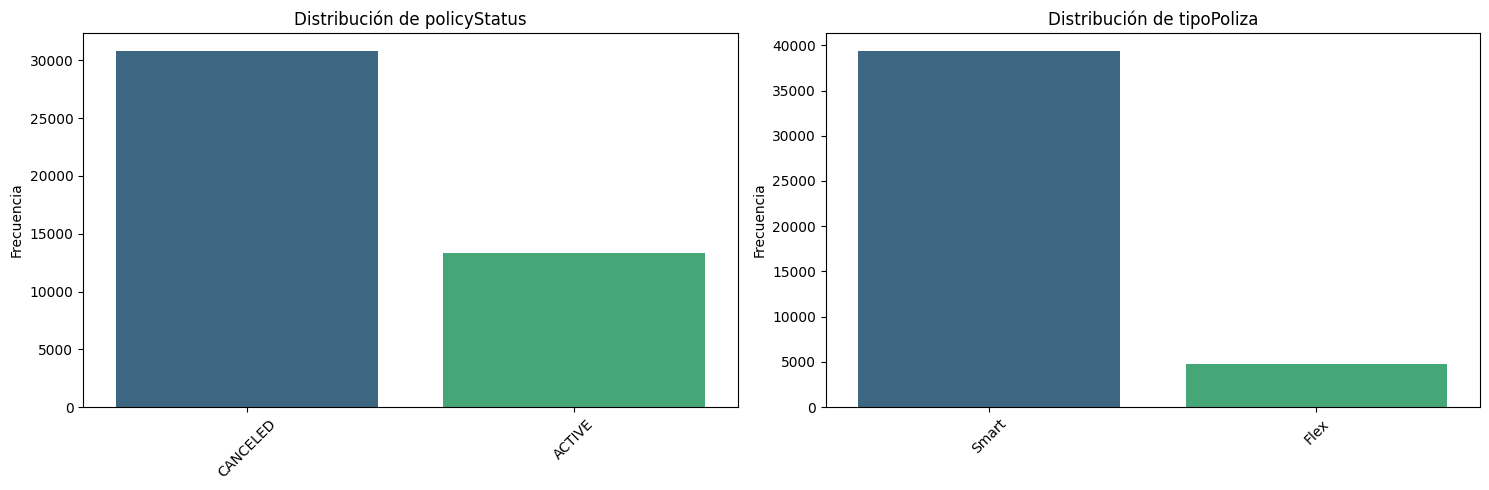

In [50]:
pinta_distribucion_categoricas(df_policies_cleaned, categoricas_p)

In [51]:
# Frecuencia Relativa
for i in categoricas_p:
    print(f"Para{i}")
    print(df_policies_cleaned[i].value_counts()/len(df_policies_cleaned)*100)
    print("\n"*2)

ParapolicyStatus
policyStatus
CANCELED    69.829089
ACTIVE      30.168647
Name: count, dtype: float64



ParatipoPoliza
tipoPoliza
Smart    89.204301
Flex     10.793435
Name: count, dtype: float64





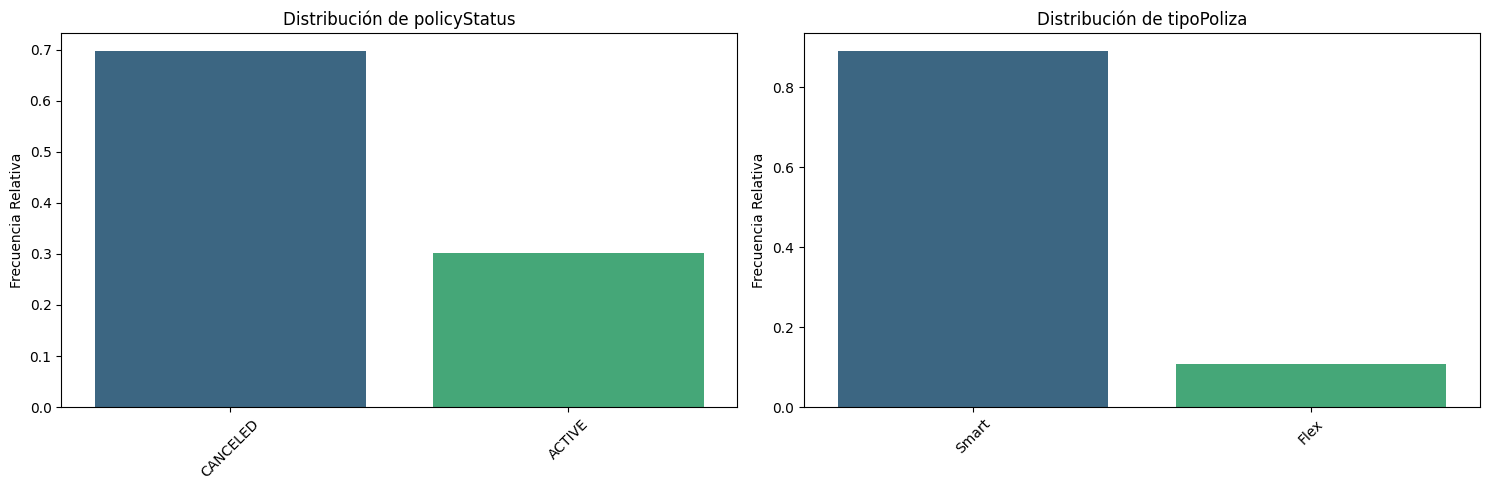

In [52]:
pinta_distribucion_categoricas(df_policies_cleaned, categoricas_p, relativa=True)

# Análisis Bivariante

In [53]:
from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas

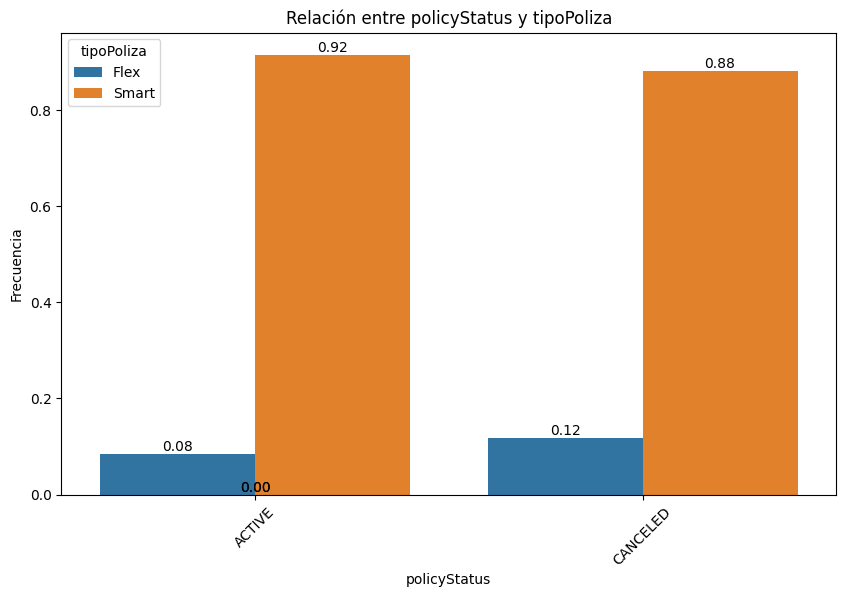

In [54]:
plot_categorical_relationship_fin(df_policies_cleaned, "policyStatus","tipoPoliza", relative_freq = True, show_values = True)